In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('procedures.csv', parse_dates=['DATE'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,271227.08,1334.88,2017-08-03 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,de573182-8235-4b15-ae99-4c75c6a5b0d4,430193006,Medication Reconciliation (procedure),416.69,NaN,NaN
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,793946.01,3204.49,2015-01-26 17:45:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e3639187-450a-4aa9-9fc9-3ea3cafa672b,430193006,Medication Reconciliation (procedure),551.78,NaN,NaN
2,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,793946.01,3204.49,2017-01-09 17:45:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,4607e1a1-f2bb-42c8-a2fd-8709331a935d,430193006,Medication Reconciliation (procedure),585.69,NaN,NaN
3,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,574111.90,2606.40,2010-07-27 12:58:08+00:00,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,430193006,Medication Reconciliation (procedure),726.51,NaN,NaN
4,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,574111.90,2606.40,2017-01-22 12:58:08+00:00,10339b10-3cd1-4ac3-ac13-ec26728cb592,4ec8d55b-05fc-42a5-bfa3-1e233874a362,288086009,Suture open wound,11354.55,284551006.0,Laceration of foot


In [3]:
dt_stop = df_al['DATE'].dropna()
dt_stop = dt_stop.unique()
dt_stop

<DatetimeArray>
['2017-08-03 15:02:18+00:00', '2015-01-26 17:45:28+00:00',
 '2017-01-09 17:45:28+00:00', '2010-07-27 12:58:08+00:00',
 '2017-01-22 12:58:08+00:00', '2017-08-08 12:58:08+00:00',
 '2019-04-23 12:58:08+00:00', '2019-05-07 12:58:08+00:00',
 '2011-04-30 00:26:23+00:00', '2013-04-23 00:26:23+00:00',
 ...
 '1987-09-27 17:27:52+00:00', '1988-01-16 17:27:52+00:00',
 '1988-03-25 17:27:52+00:00', '1989-03-20 17:27:52+00:00',
 '1990-03-15 17:27:52+00:00', '2010-05-22 17:27:52+00:00',
 '2013-06-08 17:27:52+00:00', '2015-06-20 17:27:52+00:00',
 '2017-07-01 17:27:52+00:00', '2019-07-13 17:27:52+00:00']
Length: 20632, dtype: datetime64[ns, UTC]

In [4]:
df_al['DATE'] = df_al['DATE'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['DATE'] = df_al['DATE'].replace({pd.NaT: "0"})
df_al['DATE']

0        1
1        1
2        1
3        1
4        1
        ..
34976    1
34977    1
34978    1
34979    1
34980    1
Name: DATE, Length: 34981, dtype: int64

In [5]:
contigency = pd.crosstab(df_al['DATE'], df_al['REASONDESCRIPTION'])
contigency

REASONDESCRIPTION,Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Appendicitis,Atrial Fibrillation,Bullet wound,Cardiac Arrest,Child attention deficit disorder,Childhood asthma,Chronic obstructive bronchitis (disorder),Closed fracture of hip,...,Primary malignant neoplasm of colon,Primary small cell malignant neoplasm of lung TNM stage 1 (disorder),Pulmonary emphysema (disorder),Recurrent rectal polyp,Rupture of patellar tendon,Secondary malignant neoplasm of colon,Streptococcal sore throat (disorder),Stroke,Suspected lung cancer (situation),Tubal pregnancy
DATE,,,,,,,,,,,,,,,,,,,,,
1,440,241,9,1231,1,48,266,14,123,12,...,1,32,276,16,7,22,75,60,45,1


<AxesSubplot:xlabel='REASONDESCRIPTION', ylabel='DATE'>

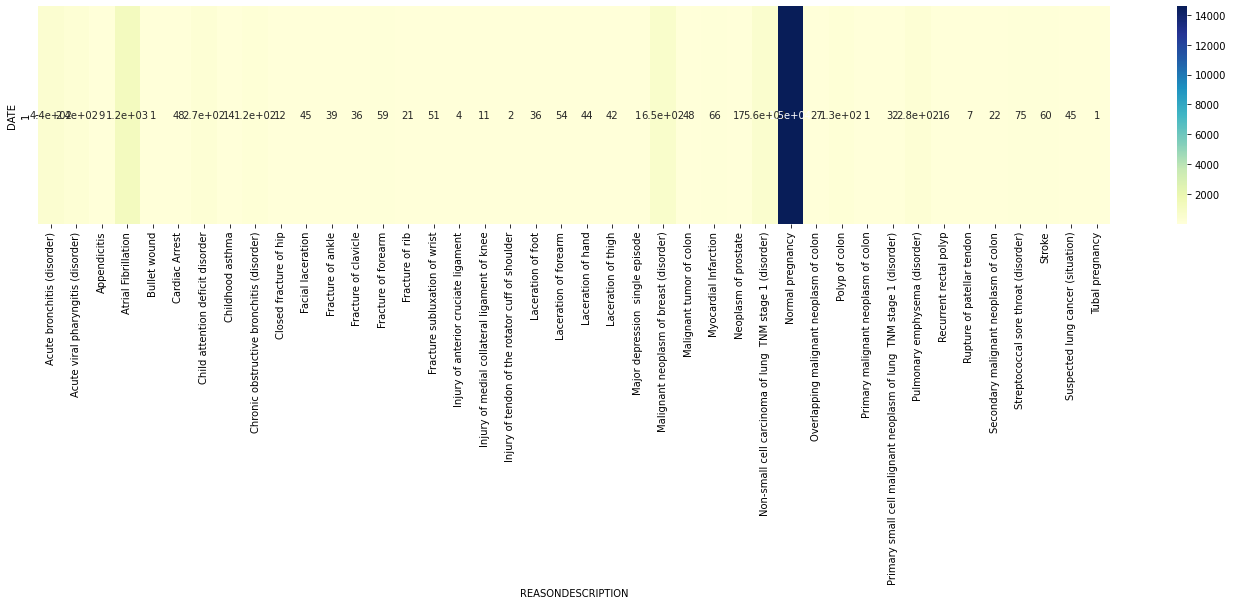

In [6]:
plt.figure(figsize=(24,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

1.0

In [8]:
features_column = ['RACE', 'ETHNICITY', 'GENDER', 'REASONDESCRIPTION']
label_column = ['DATE']

In [9]:
dataset = df_al[features_column + label_column]
dataset['DATE'] = dataset['DATE'].astype('int32')

#reference for numerical categories
categorical_dict = {}

#convert categorical data into numerical data
for feature_name in features_column:
    dataset[feature_name] = dataset[feature_name].astype('category')
    categorical_dict.update({feature_name: dataset[feature_name].cat.categories})
    dataset[feature_name] = dataset[feature_name].astype('category').cat.codes
    
print(categorical_dict)

{'RACE': Index(['asian', 'black', 'native', 'other', 'white'], dtype='object'), 'ETHNICITY': Index(['hispanic', 'nonhispanic'], dtype='object'), 'GENDER': Index(['F', 'M'], dtype='object'), 'REASONDESCRIPTION': Index(['Acute bronchitis (disorder)', 'Acute viral pharyngitis (disorder)',
       'Appendicitis', 'Atrial Fibrillation', 'Bullet wound', 'Cardiac Arrest',
       'Child attention deficit disorder', 'Childhood asthma',
       'Chronic obstructive bronchitis (disorder)', 'Closed fracture of hip',
       'Facial laceration', 'Fracture of ankle', 'Fracture of clavicle',
       'Fracture of forearm', 'Fracture of rib',
       'Fracture subluxation of wrist', 'Injury of anterior cruciate ligament',
       'Injury of medial collateral ligament of knee',
       'Injury of tendon of the rotator cuff of shoulder',
       'Laceration of foot', 'Laceration of forearm', 'Laceration of hand',
       'Laceration of thigh', 'Major depression  single episode',
       'Malignant neoplasm of brea

C:\Users\MELOEL~1\AppData\Local\Temp/ipykernel_9700/1744773145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DATE'] = dataset['DATE'].astype('int32')
C:\Users\MELOEL~1\AppData\Local\Temp/ipykernel_9700/1744773145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature_name] = dataset[feature_name].astype('category')
C:\Users\MELOEL~1\AppData\Local\Temp/ipykernel_9700/1744773145.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('DATE')
test_labels = test_features.pop('DATE')

In [12]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(len(features_column)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error', metrics = ['accuracy'],
                optimizer = 'adam')
  return model

In [13]:
model = build_and_compile_model()

In [14]:
#fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            mode='min')
history = model.fit(
    train_features[features_column],
    train_labels,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1, epochs=100)

Epoch 1/100
700/700 [==============================] - 1s 865us/step - loss: 0.0968 - accuracy: 0.9563 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 2/100
700/700 [==============================] - 0s 670us/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 3/100
700/700 [==============================] - 0s 676us/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 627us/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 571us/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 581us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 593us/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0029 - val_ac

In [15]:
model.evaluate(test_features[features_column], test_labels)

219/219 [==============================] - 0s 399us/step - loss: 0.0191 - accuracy: 1.0000


[0.019116399809718132, 1.0]

In [16]:
model.save('model_procedures')

INFO:tensorflow:Assets written to: model_procedures\assets
